### Ejercicios Clase 6

In [1]:
import numpy as np # libreria básica operadores matemáticos y de arreglos
import matplotlib.pylab as plt # librería de graficación
#%matplotlib inline # libreria de incrustación en el notebook
import math # libreria de operadores matemáticos especiales
import sympy as sp
import random

#### 1. Realice la correlación entre dos secuencias aleatorias. Recuerde definir el vector de retraso. Grafíquelas. ¿Que puede analizar de las gráficas? ¿Para que sirve la correlación? 

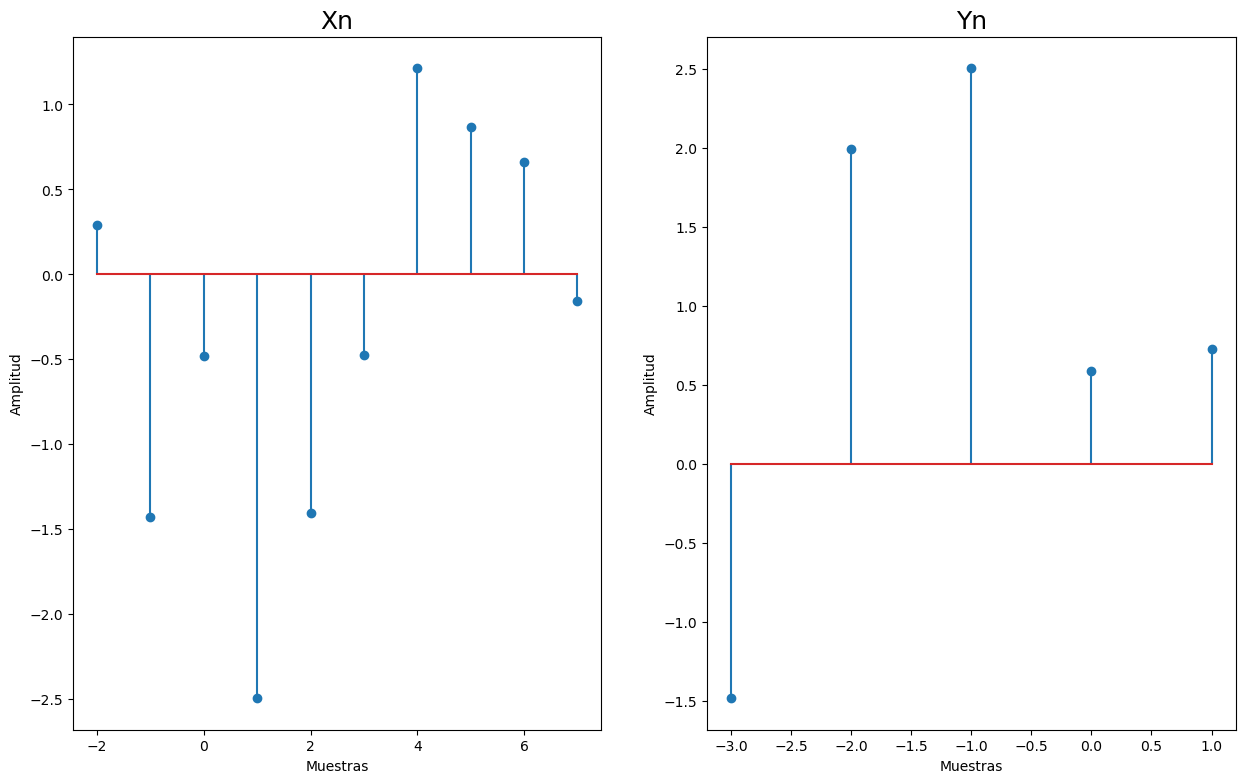

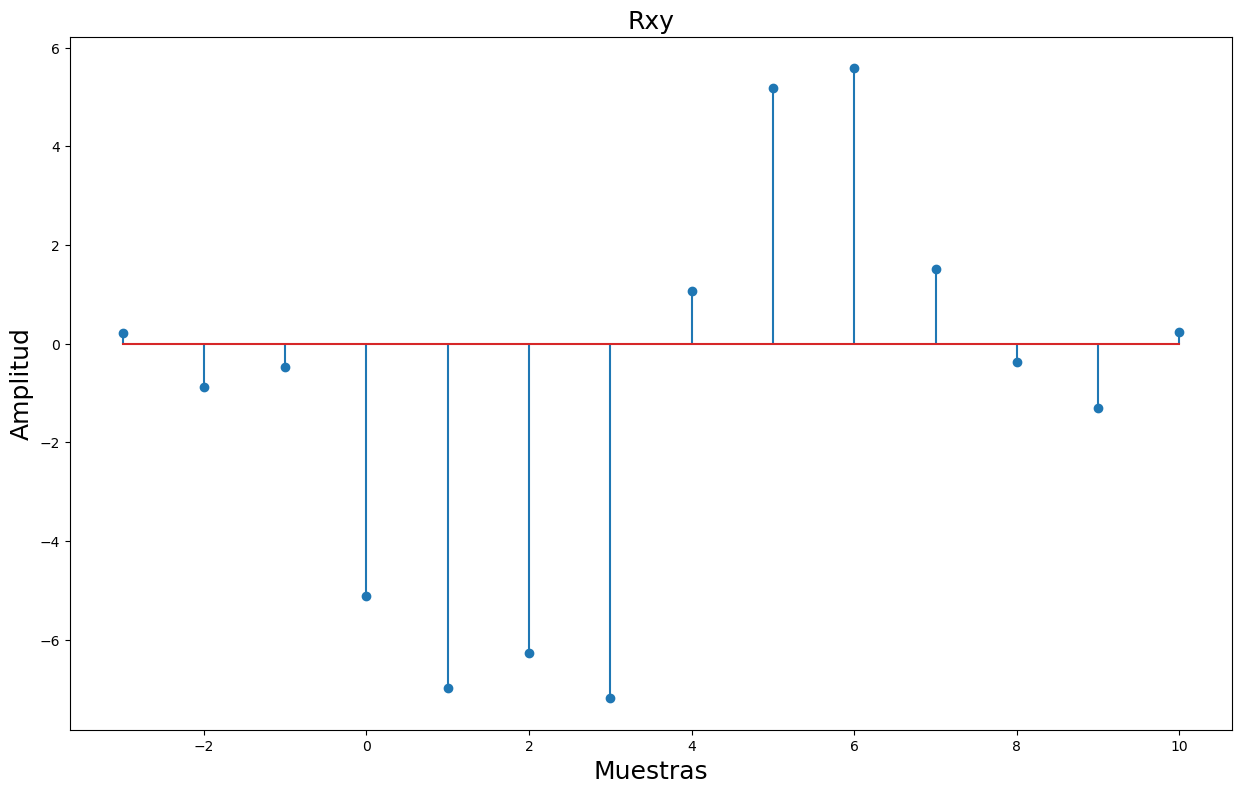

In [2]:
l=10
Xn=np.random.randn(l)
posicion_0x=2
k=5
Yn=np.random.randn(k)
posicion_0y=3
Rxy=np.correlate(Xn,Yn, mode='full')
tau=np.arange(-posicion_0y,l+1,1) # vector de retraso
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
ax1.stem(np.arange(-posicion_0x,l-posicion_0x,1),Xn, use_line_collection=True)
ax1.set_title("Xn",fontsize=18)
ax1.set_xlabel("Muestras")
ax1.set_ylabel("Amplitud")

ax2.stem(np.arange(-posicion_0y,k-posicion_0y,1),Yn, use_line_collection=True)
#ax2.stem(n, y_desplazada, use_line_collection=True)
ax2.set_title("Yn",fontsize=18)
ax2.set_xlabel("Muestras")
ax2.set_ylabel("Amplitud")


plt.figure(figsize=(15,9))# tamaño de la figura
plt.stem(tau,Rxy) # Dibujar la grafica
plt.title("Rxy",fontsize=18)
plt.xlabel('Muestras',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitud',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica

#### 2. Realice una función para calcular la transformada Z. Recuerde que debe definir su región de convergencia, ya que esto es de vital importancia. ¿Puede existir una función de transferencia igual, pero con diferente ROC?

In [3]:
Z=sp.Symbol('Z')
def ztrans(Xn,zero_pos):
    Z=sp.Symbol('Z')
    if (abs(zero_pos)>(len(Xn)-1)):
        print('Secuencia insuficiente')
        return None
    Xz=Xn
    XZ=0
    if(zero_pos==0):
        print('ROC= Todo el plano Z exepto Z=0')
        for k in range(len(Xz)):
            XZ+=Xz[k]*Z**(-k)
    elif(zero_pos==len(Xz)-1):
        print('ROC= Todo el plano Z exepto Z=inf')
        for k in np.arange(-zero_pos,len(Xz)-zero_pos,1):
            XZ+=Xz[k+zero_pos]*Z**(-k)
    else:
        print('ROC= Todo el plano Z exepto Z=inf y Z=0')
        for k in np.arange(-zero_pos,len(Xz)-zero_pos,1):
            XZ+=Xz[k+zero_pos]*Z**(-k)
    return XZ
    
    

In [4]:
l=8
Xn=[1,3,5,9,30,35,45,50]#np.random.randn(l)
posicion_0x=0 #random.randint(0,l-1)
print(ztrans(Xn,posicion_0x))

ROC= Todo el plano Z exepto Z=0
1 + 3/Z + 5/Z**2 + 9/Z**3 + 30/Z**4 + 35/Z**5 + 45/Z**6 + 50/Z**7
